**Mengimport file/data dari kaggle* **teks tebal**

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d mohansacharya/graduate-admissions

Dataset URL: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions
License(s): CC0-1.0
  0% 0.00/9.64k [00:00<?, ?B/s]
100% 9.64k/9.64k [00:00<00:00, 31.3MB/s]


In [ ]:
!unzip graduate-admissions.zip

Archive:  graduate-admissions.zip
  inflating: Admission_Predict.csv   
  inflating: Admission_Predict_Ver1.1.csv  


In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.7 MB/s eta 0:00:00


In [ ]:
#Import Libraray yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#library fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#Mengecek nilai null
df.isnull().sum()


,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
#Mengecek duplikat
df.duplicated().sum()


np.int64(0)

In [ ]:
# Hapus kolom "Serial No."
df.drop(columns=["Serial No."], inplace=True)
df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


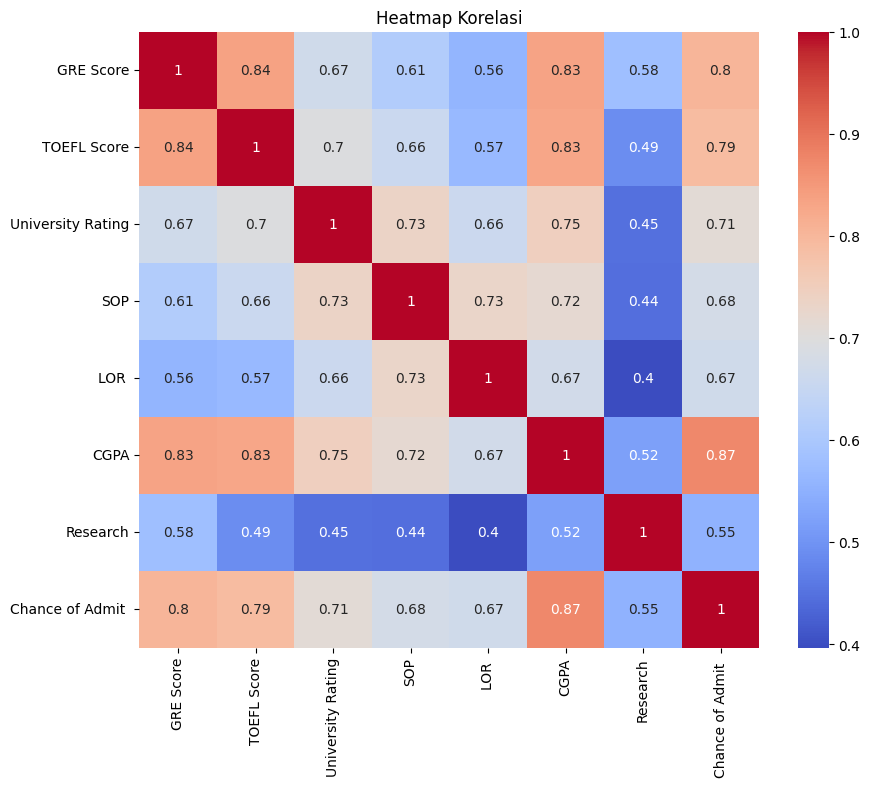

In [ ]:
#Korelasi antara feature dangan targe(chance of admit)


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

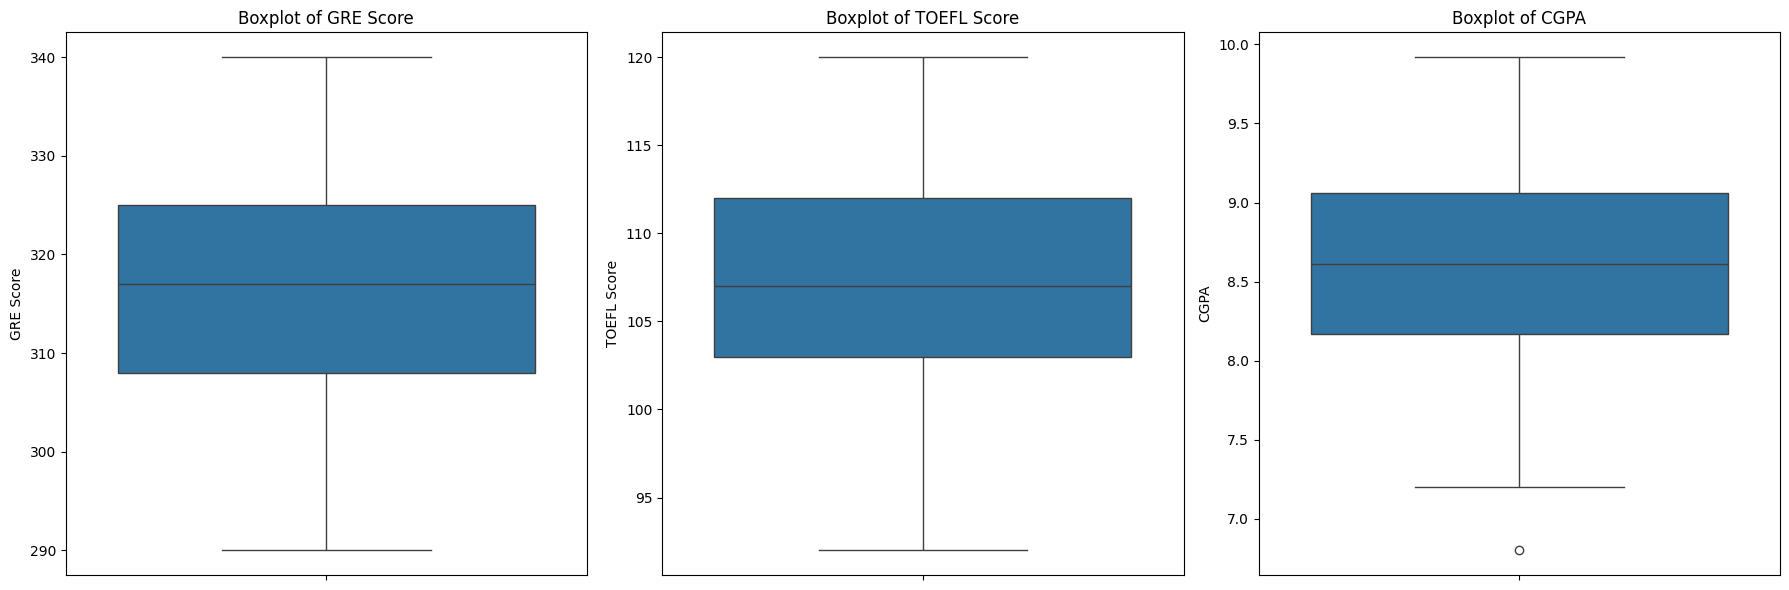

In [ ]:


# Buat boxplot untuk GRE Score, TOEFL Score, dan CGPA dalam satu figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(ax=axes[0], y=df['GRE Score'])
axes[0].set_title('Boxplot of GRE Score')
axes[0].set_ylabel('GRE Score')

sns.boxplot(ax=axes[1], y=df['TOEFL Score'])
axes[1].set_title('Boxplot of TOEFL Score')
axes[1].set_ylabel('TOEFL Score')

sns.boxplot(ax=axes[2], y=df['CGPA'])
axes[2].set_title('Boxplot of CGPA')
axes[2].set_ylabel('CGPA')

plt.tight_layout()
plt.show()

Jumlah baris setelah menghapus outlier: 399


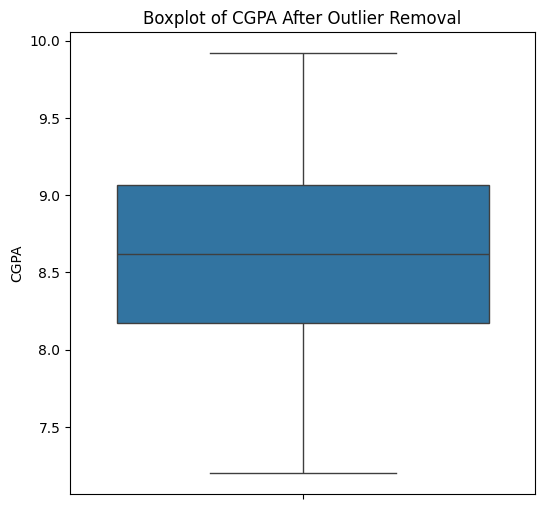

In [ ]:
# Menentukan ambang batas Z-score (misalnya 3)
z_threshold = 3

# Menghitung Z-score untuk kolom 'CGPA'
z_scores = np.abs((df['CGPA'] - df['CGPA'].mean()) / df['CGPA'].std())

# Membuat mask untuk outlier
outlier_mask = z_scores > z_threshold

# Menghapus baris yang mengandung outlier
df = df[~outlier_mask].copy()

# Menampilkan jumlah baris sebelum dan sesudah penghapusan outlier
print(f"Jumlah baris setelah menghapus outlier: {len(df)}")

# Tampilkan boxplot CGPA setelah menghapus outlier
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['CGPA'])
plt.title('Boxplot of CGPA After Outlier Removal')
plt.ylabel('CGPA')
plt.show()

In [ ]:
#Mengecek nilai null
df.isnull().sum()


,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
#mendefinisikan input dan output
GRE = ctrl.Antecedent(np.arange(260, 341, 1), 'GRE')
TOEFL = ctrl.Antecedent(np.arange(0, 121, 1), 'TOEFL')
CGPA = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'CGPA')
lulus = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'lulus')

In [ ]:
#fungsi keanggotaan GRE
GRE['low'] = fuzz.trimf(GRE.universe, [260, 290, 305])
GRE['med'] = fuzz.trimf(GRE.universe, [295, 315, 330])
GRE['high'] = fuzz.trimf(GRE.universe, [320, 335, 340])

#fungsi keangotaan TOEFl
TOEFL['low'] = fuzz.trimf(TOEFL.universe, [0, 90, 100])
TOEFL['med'] = fuzz.trimf(TOEFL.universe, [95, 108, 115])
TOEFL['high'] = fuzz.trimf(TOEFL.universe, [110, 118, 120])

#fungsi keanggotaan CGPA
CGPA['low'] = fuzz.trimf(CGPA.universe, [0.0, 6.5, 7.5])
CGPA['med'] = fuzz.trimf(CGPA.universe, [7.0, 8.2, 9.0])
CGPA['high'] = fuzz.trimf(CGPA.universe, [8.5, 9.5, 10.0])

#fungsi keanggotaan untuk lulus
lulus['tidak diterima'] = fuzz.trimf(lulus.universe, [0.0, 0.2, 0.4])
lulus['dipertimbangkan'] = fuzz.trimf(lulus.universe, [0.3, 0.6, 0.8])
lulus['diterima'] = fuzz.trimf(lulus.universe, [0.7, 0.9, 1.0])


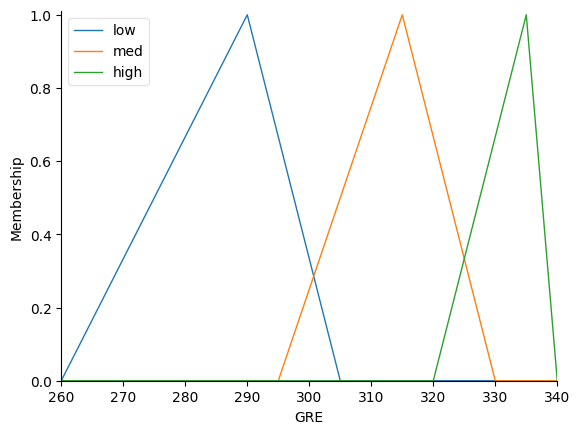

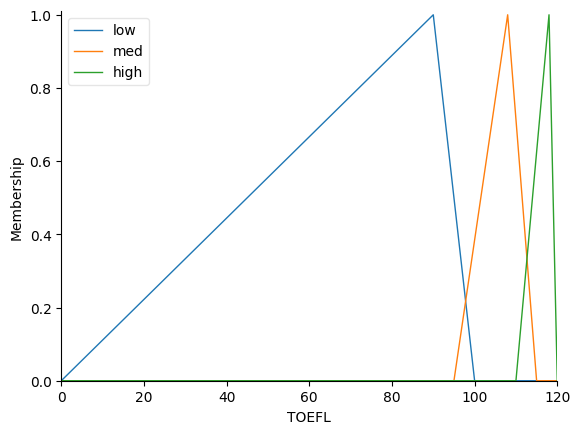

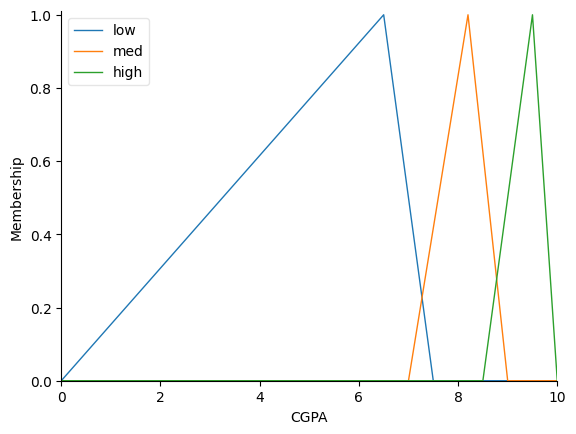

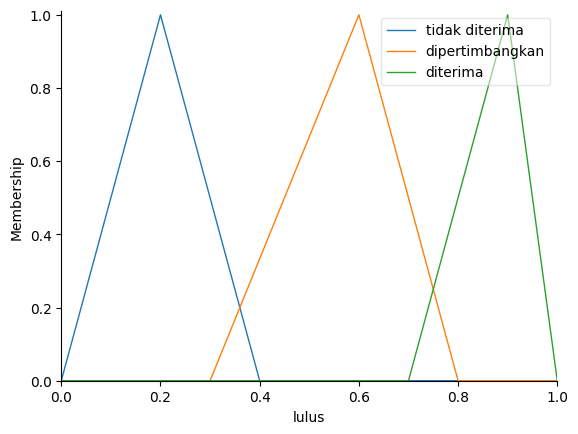

In [ ]:
#tampilkan grafik
GRE.view()
TOEFL.view()
CGPA.view()
lulus.view()

In [ ]:
# ===== RULES UNTUK KONDISI "DITERIMA" =====
rule1 = ctrl.Rule(GRE['high'] & TOEFL['high'] & CGPA['high'], lulus['diterima'])
rule2 = ctrl.Rule(GRE['high'] & TOEFL['med'] & CGPA['high'], lulus['diterima'])
rule3 = ctrl.Rule(GRE['med']  & TOEFL['high'] & CGPA['high'], lulus['diterima'])
rule4 = ctrl.Rule(GRE['high'] & TOEFL['high'] & CGPA['med'], lulus['diterima'])
rule5 = ctrl.Rule(GRE['med']  & TOEFL['med'] & CGPA['high'], lulus['diterima'])
rule6 = ctrl.Rule(GRE['high'] & TOEFL['med'] & CGPA['med'], lulus['diterima'])
rule7 = ctrl.Rule(GRE['med']  & TOEFL['high'] & CGPA['med'], lulus['diterima'])
rule8 = ctrl.Rule(GRE['high'] & TOEFL['low'] & CGPA['high'], lulus['diterima'])
rule9 = ctrl.Rule(GRE['high'] & TOEFL['high'] & CGPA['low'], lulus['diterima'])
rule10 = ctrl.Rule(GRE['med'] & TOEFL['med'] & CGPA['med'], lulus['diterima'])

# ===== RULES UNTUK KONDISI "TIDAK DITERIMA" =====
rule11 = ctrl.Rule(GRE['low'] & TOEFL['low'] & CGPA['low'], lulus['tidak diterima'])
rule12 = ctrl.Rule(GRE['low'] & TOEFL['med'] & CGPA['low'], lulus['tidak diterima'])
rule13 = ctrl.Rule(GRE['med'] & TOEFL['low'] & CGPA['low'], lulus['tidak diterima'])
rule14 = ctrl.Rule(GRE['low'] & TOEFL['low'] & CGPA['med'], lulus['tidak diterima'])
rule15 = ctrl.Rule(GRE['low'] & TOEFL['med'] & CGPA['med'], lulus['tidak diterima'])
rule16 = ctrl.Rule(GRE['med'] & TOEFL['low'] & CGPA['med'], lulus['tidak diterima'])
rule17 = ctrl.Rule(GRE['low'] & TOEFL['low'] & CGPA['high'], lulus['tidak diterima'])
rule18 = ctrl.Rule(GRE['low'] & TOEFL['high'] & CGPA['low'], lulus['tidak diterima'])
rule19 = ctrl.Rule(GRE['med'] & TOEFL['low'] & CGPA['high'], lulus['tidak diterima'])
rule20 = ctrl.Rule(GRE['low'] & TOEFL['high'] & CGPA['med'], lulus['tidak diterima'])

# ===== RULES UNTUK KONDISI "DIPERTIMBANGKAN" =====
rule21 = ctrl.Rule(GRE['high'] & TOEFL['low'] & CGPA['low'], lulus['dipertimbangkan'])
rule22 = ctrl.Rule(GRE['high'] & TOEFL['med'] & CGPA['low'], lulus['dipertimbangkan'])
rule23 = ctrl.Rule(GRE['high'] & TOEFL['low'] & CGPA['med'], lulus['dipertimbangkan'])
rule24 = ctrl.Rule(GRE['med'] & TOEFL['high'] & CGPA['low'], lulus['dipertimbangkan'])
rule25 = ctrl.Rule(GRE['med'] & TOEFL['low'] & CGPA['high'], lulus['dipertimbangkan'])
rule26 = ctrl.Rule(GRE['med'] & TOEFL['med'] & CGPA['low'], lulus['dipertimbangkan'])
rule27 = ctrl.Rule(GRE['low'] & TOEFL['high'] & CGPA['high'], lulus['dipertimbangkan'])
rule28 = ctrl.Rule(GRE['low'] & TOEFL['med'] & CGPA['high'], lulus['dipertimbangkan'])



# ===== SISTEM KONTROL FUZZY =====
lulus_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
    rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20,
    rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28
])

lulus_simulasi = ctrl.ControlSystemSimulation(lulus_ctrl)

In [ ]:
# Mensimulasikan input baru
lulus_simulasi.input['GRE'] = 320
lulus_simulasi.input['TOEFL'] = 100
lulus_simulasi.input['CGPA'] = 8.5

# Menghitung hasil
lulus_simulasi.compute()



Kemungkinan Lulus: 0.86


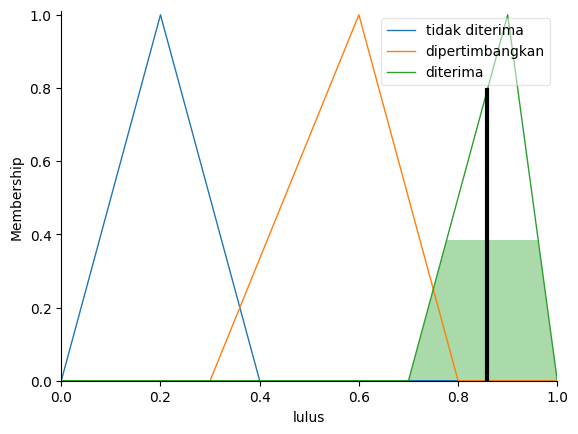

In [ ]:

# Menampilkan hasil
print(f"Kemungkinan Lulus: {lulus_simulasi.output['lulus']:.2f}")

# Tampilkan grafik
lulus.view(sim=lulus_simulasi)

In [ ]:
#impeort library
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Ambil input dari dataset
GRE_values = df['GRE Score'].values
TOEFL_values = df['TOEFL Score'].values
CGPA_values = df['CGPA'].values
y_true = df['Chance of Admit '].values

hasil_prediksi = []

for gre, toefl, cgpa in zip(GRE_values, TOEFL_values, CGPA_values):
    try:
        lulus_simulasi.input['GRE'] = gre
        lulus_simulasi.input['TOEFL'] = toefl
        lulus_simulasi.input['CGPA'] = cgpa
        lulus_simulasi.compute()
        hasil_prediksi.append(lulus_simulasi.output['lulus'])
    except:
        hasil_prediksi.append(np.nan)  # Jika gagal (misal out of range), beri Na

In [ ]:
# Ubah ke numpy array
y_pred = np.array(hasil_prediksi)
y_true = np.array(y_true)

# Hilangkan nilai NaN
mask = ~np.isnan(y_pred)
y_pred_clean = y_pred[mask]
y_true_clean = y_true[mask]

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # Hapus import r2_score
import numpy as np

# Evaluasi
mse = mean_squared_error(y_true_clean, y_pred_clean)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true_clean, y_pred_clean)

print(f"Evaluasi Model Mamdani:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Evaluasi Model Mamdani:
Mean Squared Error (MSE): 0.0275
Root Mean Squared Error (RMSE): 0.1659
Mean Absolute Error (MAE): 0.1340


In [ ]:


# Fungsi keanggotaan Trapesium untuk GRE Score
def gre_low(x):
    # Rentang rendah: 260 -> 275 -> 290 -> 300
    # Derajat 1 dari 260 sampai 275, menurun linier ke 0 di 300
    if x <= 260: return 1
    elif 260 < x <= 275: return 1
    elif 275 < x <= 300: return (300 - x) / (300 - 275)
    else: return 0

def gre_med(x):
    # Rentang menengah: 280 -> 295 -> 315 -> 330
    # Derajat 0 di 280, meningkat linier ke 1 di 295, tetap 1 sampai 315, menurun linier ke 0 di 330
    if x <= 280: return 0
    elif 280 < x <= 295: return (x - 280) / (295 - 280)
    elif 295 < x <= 315: return 1
    elif 315 < x <= 330: return (330 - x) / (330 - 315)
    else: return 0

def gre_high(x):
    # Rentang tinggi: 310 -> 320 -> 340 -> 340
    # Derajat 0 di 310, meningkat linier ke 1 di 320, tetap 1 sampai 340
    if x <= 310: return 0
    elif 310 < x <= 320: return (x - 310) / (320 - 310)
    elif 320 < x <= 340: return 1
    else: return 1 # Atau bisa juga 1 untuk x > 340, tergantung interpretasi

# Fungsi keanggotaan Trapesium untuk TOEFL Score
def toefl_low(x):
    # Rentang rendah: 0 -> 10 -> 85 -> 95
    if x <= 0: return 1
    elif 0 < x <= 10: return 1
    elif 10 < x <= 95: return (95 - x) / (95 - 10)
    else: return 0

def toefl_med(x):
    # Rentang menengah: 80 -> 90 -> 105 -> 115
    if x <= 80: return 0
    elif 80 < x <= 90: return (x - 80) / (90 - 80)
    elif 90 < x <= 105: return 1
    elif 105 < x <= 115: return (115 - x) / (115 - 105)
    else: return 0

def toefl_high(x):
    # Rentang tinggi: 110 -> 118 -> 120 -> 120
    if x <= 110: return 0
    elif 110 < x <= 118: return (x - 110) / (118 - 110)
    elif 118 < x <= 120: return 1
    else: return 1 # Atau bisa juga 1 untuk x > 120

# Fungsi keanggotaan Trapesium untuk CGPA
def cgpa_low(x):
    # Rentang rendah: 0 -> 0.5 -> 6.0 -> 7.0
    if x <= 0: return 1
    elif 0 < x <= 0.5: return 1
    elif 0.5 < x <= 7.0: return (7.0 - x) / (7.0 - 0.5)
    else: return 0

def cgpa_med(x):
    # Rentang menengah: 6.5 -> 7.5 -> 8.5 -> 9.5
    if x <= 6.5: return 0
    elif 6.5 < x <= 7.5: return (x - 6.5) / (7.5 - 6.5)
    elif 7.5 < x <= 8.5: return 1
    elif 8.5 < x <= 9.5: return (9.5 - x) / (9.5 - 8.5)
    else: return 0

def cgpa_high(x):
    # Rentang tinggi: 9.0 -> 9.5 -> 10.0 -> 10.0
    if x <= 9.0: return 0
    elif 9.0 < x <= 9.5: return (x - 9.0) / (9.5 - 9.0)
    elif 9.5 < x <= 10.0: return 1
    else: return 1 # Atau bisa juga 1 untuk x > 10.0

# Fungsi prediksi Sugeno
def sugeno_predict(gre, toefl, cgpa):
    # Rules including 'med'
    w1 = min(gre_high(gre), toefl_high(toefl), cgpa_high(cgpa)) # high, high, high
    w2 = min(gre_low(gre), toefl_low(toefl), cgpa_low(cgpa))   # low, low, low
    w3 = min(gre_med(gre), toefl_med(toefl), cgpa_med(cgpa))   # med, med, med
    w4 = min(gre_high(gre), toefl_med(toefl), cgpa_med(cgpa)) # high, med, med
    w5 = min(gre_med(gre), toefl_high(toefl), cgpa_med(cgpa)) # med, high, med
    w6 = min(gre_med(gre), toefl_med(toefl), cgpa_high(cgpa)) # med, med, high
    w7 = min(gre_high(gre), toefl_high(toefl), cgpa_med(cgpa)) # high, high, med
    w8 = min(gre_high(gre), toefl_med(toefl), cgpa_high(cgpa)) # high, med, high
    w9 = min(gre_med(gre), toefl_high(toefl), cgpa_high(cgpa)) # med, high, high

    #mendefinisikan nilai z
    z1, z2, z3, z4, z5, z6, z7, z8, z9 = 0.9, 0.2, 0.6, 0.7, 0.75, 0.8, 0.85, 0.88, 0.82

    total_w = w1 + w2 + w3 + w4 + w5 + w6 + w7 + w8 + w9

    return (w1*z1 + w2*z2 + w3*z3 + w4*z4 + w5*z5 + w6*z6 + w7*z7 + w8*z8 + w9*z9) / total_w if total_w != 0 else 0.5

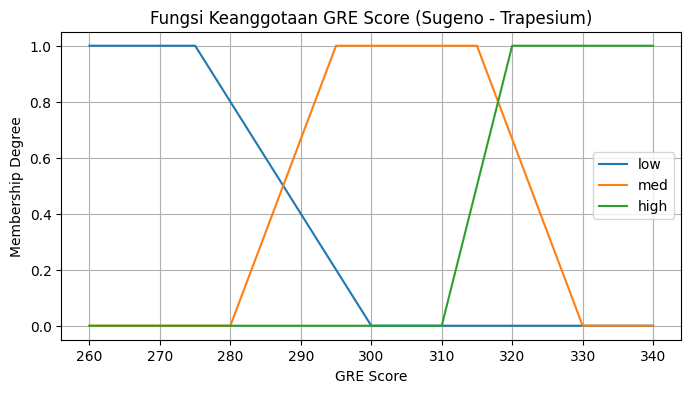

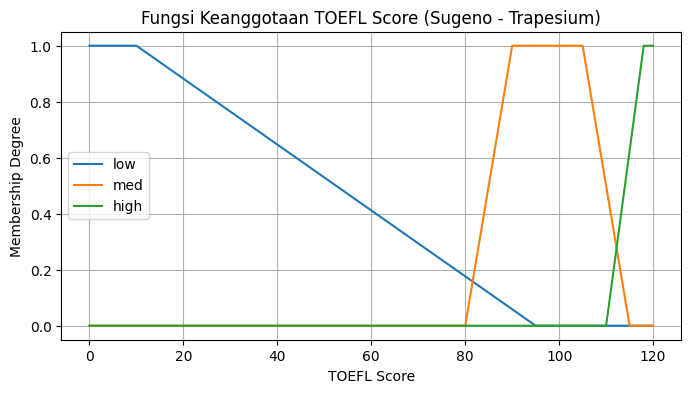

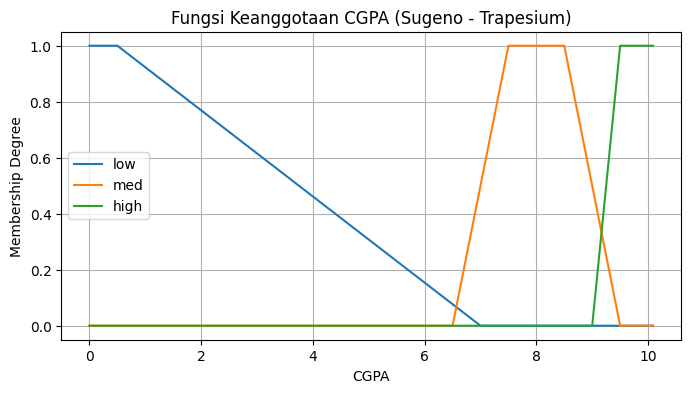

In [ ]:
# Buat rentang nilai untuk setiap input
gre_range = np.arange(260, 341, 1)
toefl_range = np.arange(0, 121, 1)
cgpa_range = np.arange(0, 10.1, 0.01)

# Plotting untuk GRE Score
plt.figure(figsize=(8, 4))
plt.plot(gre_range, [gre_low(x) for x in gre_range], label='low')
plt.plot(gre_range, [gre_med(x) for x in gre_range], label='med')
plt.plot(gre_range, [gre_high(x) for x in gre_range], label='high')
plt.title('Fungsi Keanggotaan GRE Score (Sugeno - Trapesium)')
plt.xlabel('GRE Score')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

# Plotting untuk TOEFL Score
plt.figure(figsize=(8, 4))
plt.plot(toefl_range, [toefl_low(x) for x in toefl_range], label='low')
plt.plot(toefl_range, [toefl_med(x) for x in toefl_range], label='med')
plt.plot(toefl_range, [toefl_high(x) for x in toefl_range], label='high')
plt.title('Fungsi Keanggotaan TOEFL Score (Sugeno - Trapesium)')
plt.xlabel('TOEFL Score')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

# Plotting untuk CGPA
plt.figure(figsize=(8, 4))
plt.plot(cgpa_range, [cgpa_low(x) for x in cgpa_range], label='low')
plt.plot(cgpa_range, [cgpa_med(x) for x in cgpa_range], label='med')
plt.plot(cgpa_range, [cgpa_high(x) for x in cgpa_range], label='high')
plt.title('Fungsi Keanggotaan CGPA (Sugeno - Trapesium)')
plt.xlabel('CGPA')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Prediksi seluruh data
y_pred_sugeno = [
    sugeno_predict(gre, toefl, cgpa)
    for gre, toefl, cgpa in zip(df['GRE Score'], df['TOEFL Score'], df['CGPA'])
]

In [ ]:
# Evaluasi
y_true = df['Chance of Admit '].values
mse_sugeno = mean_squared_error(y_true, y_pred_sugeno)
rmse_sugeno = np.sqrt(mse_sugeno)
mae_sugeno = mean_absolute_error(y_true, y_pred_sugeno)

print(f"Evaluasi Model Sugeno:")
print(f"Mean Squared Error (MSE): {mse_sugeno:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_sugeno:.4f}")
print(f"Mean Absolute Error (MAE): {mae_sugeno:.4f}")

Evaluasi Model Sugeno:
Mean Squared Error (MSE): 0.0091
Root Mean Squared Error (RMSE): 0.0955
Mean Absolute Error (MAE): 0.0795
